Assessment For Neural Network Regression using TensorFlow
* 1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model
to it.
* 2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
* 3. Try and improve the results
* 4. Create the plot between predict and actual values
* Please do not use exact same example as RegressionExample3
* Upload your Google Colab Notebook to GitHub

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt,tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('/content/sample_data/california_housing_test.csv')
data = data.dropna()
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [3]:
x = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
#rescales each feature
#preventing larger-valued columns (like total_rooms) from dominating smaller-valued ones

scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [6]:
#Small/simple dataset (few features, few thousand samples) -> 8 – 64 neurons
#Medium dataset (dozens of features, tens of thousands of samples) -> 64 – 256 neurons
#Large/complex dataset (many features or high variability) -> 256 – 1024+ neurons

tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(x_train_scaled.shape[1],)), #[1] -> to get the number of features,
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1)])

In [7]:
#learning rate = improve performance
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mae', metrics=["mae"])

In [8]:
history = model.fit(x_train_scaled ,y_train,epochs=200, verbose=0,validation_data=(x_test_scaled,y_test))

In [15]:
loss, mae = model.evaluate(x_test_scaled,y_test)
print(f"MAE:{mae}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 48381.3828 - mae: 48381.3828
MAE:44173.0234375


In [10]:
y_pred = model.predict(x_test_scaled)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [17]:
# from sklearn.metrics import mean_absolute_error, r2_score

# y_pred = model.predict(x_test_scaled)
# r2 = r2_score(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)

# print(f"R² = {r2:.2f}")
# print(f"MAE = {mae:.2f}")
# print(f"MAE % of mean house value = {mae / y_test.mean() * 100:.2f}%")

# On average, predictions are 22% away from the true price.
# 78% accuracy in predicting house prices.
# Anything under 25% error is considered reasonable

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
R² = 0.68
MAE = 44173.02
MAE % of mean house value = 22.08%


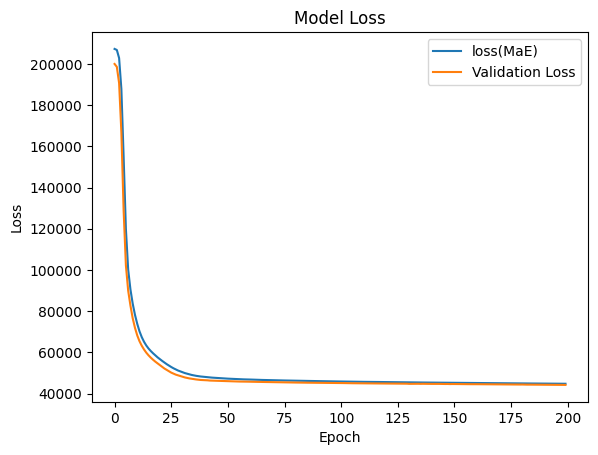

In [11]:
#Overfit = Training loss very low, but validation loss high and rising.
#Underfit = High training loss and high validation loss (both bad).
#Good fit = Both training and validation losses go down and stay close together.

plt.plot(history.history['loss'], label= 'loss(MaE)')
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

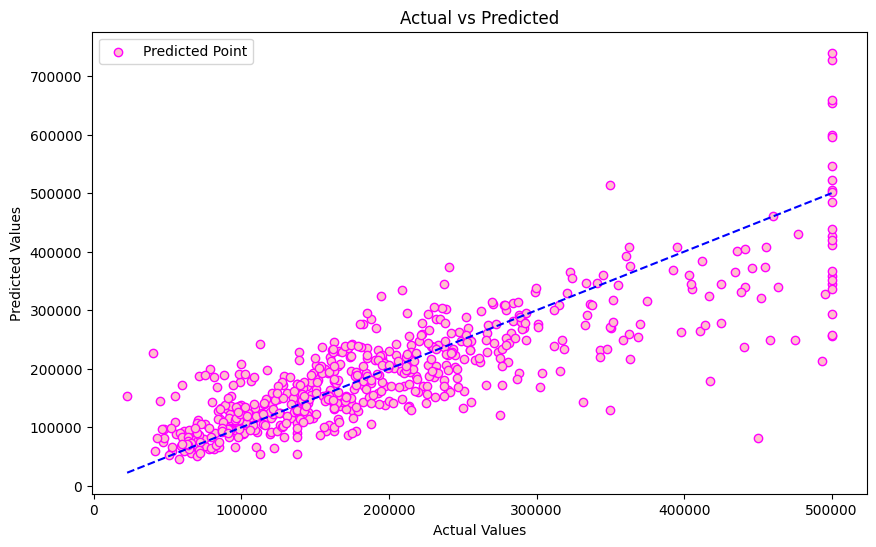

In [33]:
plt.figure(figsize=(10,6))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--')
plt.scatter(y_test, y_pred,c='pink', label='Predicted Point',edgecolors='magenta')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("Actual vs Predicted")
plt.show()

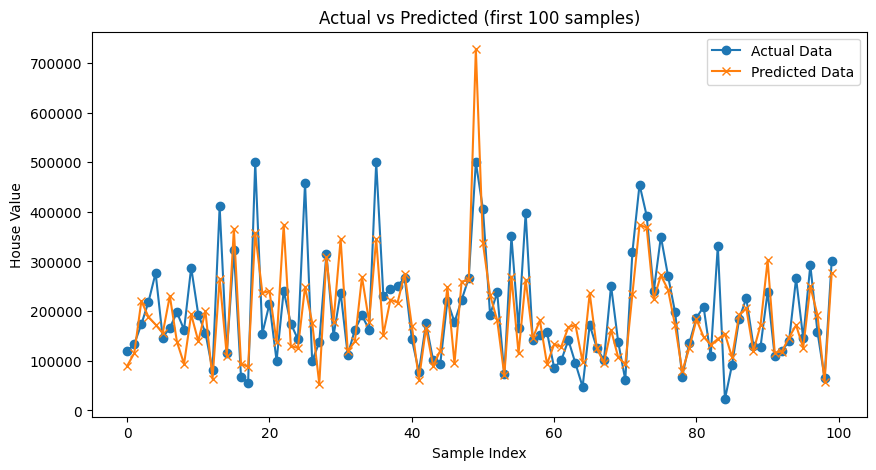

In [13]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label="Actual Data", marker='o')
plt.plot(y_pred[:100], label="Predicted Data", marker='x')
plt.title("Actual vs Predicted (first 100 samples)")
plt.xlabel("Sample Index")
plt.ylabel("House Value")
plt.legend()
plt.show()